In [32]:
import pandas as pd
inpatient = pd.read_csv('../project/Train_Inpatientdata.csv')

In [33]:
# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split  # not used here, we use <2015 and >=2015 to split data
# from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# from sklearn.pipeline import FeatureUnion  # not sure which one to choose, the featureunion or the columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# Set seed for reproducibility
seed1, seed2, seed3=101,67, 42

In [34]:
claimYear = pd.DatetimeIndex(inpatient['ClaimEndDt']).year

In [35]:
claimYear.unique()

Int64Index([2009], dtype='int64', name='ClaimEndDt')

In [36]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [37]:
outpatient = pd.read_csv('../project/Train_Outpatientdata.csv')

In [38]:
outpatient.head(25)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,...,71596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [9]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [39]:
beneficiary = pd.read_csv('../project/Train_Beneficiarydata.csv')
beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [7]:
provider = pd.read_csv('../project/Train.csv')
provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [129]:
provider[provider['PotentialFraud'] == 'Yes']

,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes
...,...,...
5307,PRV57642,Yes
5324,PRV57667,Yes
5329,PRV57672,Yes
5351,PRV57697,Yes


In [22]:
for id in inpatient.BeneID:
    if id in outpatient.BeneID:
        print("find duplication", id)
print('done')

done


In [19]:
len(outpatient.ClaimID.drop_duplicates())

517737

In [24]:
len(inpatient.DiagnosisGroupCode.unique())

736

In [26]:
len(inpatient.ClmDiagnosisCode_1.unique())

2254

In [27]:
len(inpatient.ClmDiagnosisCode_2.unique())

2440

In [28]:
len(inpatient.ClmDiagnosisCode_3.unique())

2428

In [29]:
len(inpatient.ClmDiagnosisCode_4.unique())

2442

In [30]:
len(inpatient.ClmDiagnosisCode_5.unique())

2375

In [31]:
len(inpatient.ClmDiagnosisCode_6.unique())

2359

In [32]:
len(inpatient.ClmDiagnosisCode_7.unique())

2311

In [33]:
len(inpatient.ClmDiagnosisCode_8.unique())

2244

In [34]:
len(inpatient.ClmDiagnosisCode_9.unique())

2095

In [35]:
len(inpatient.ClmDiagnosisCode_10.unique())

953

In [36]:
len(inpatient.ClmProcedureCode_1.unique())

1118

In [37]:
len(inpatient.ClmProcedureCode_2.unique())

298

In [38]:
len(inpatient.ClmProcedureCode_3.unique())

155

In [39]:
len(inpatient.ClmProcedureCode_4.unique())

49

In [40]:
len(inpatient.ClmProcedureCode_5.unique())

7

In [41]:
len(inpatient.ClmProcedureCode_6.unique())

1

In [42]:
len(outpatient.ClmProcedureCode_1.unique())

81

In [43]:
len(outpatient.ClmProcedureCode_2.unique())

23

In [44]:
len(outpatient.ClmProcedureCode_3.unique())

5

In [45]:
len(outpatient.ClmProcedureCode_4.unique())

3

In [46]:
len(outpatient.ClmProcedureCode_5.unique())

1

In [47]:
len(outpatient.ClmProcedureCode_6.unique())

1

In [48]:
len(outpatient.ClmDiagnosisCode_1.unique())

10355

In [49]:
len(outpatient.ClmDiagnosisCode_2.unique())

5057

In [50]:
len(outpatient.ClmDiagnosisCode_3.unique())

4449

In [51]:
len(outpatient.ClmDiagnosisCode_4.unique())

3926

In [52]:
len(outpatient.ClmDiagnosisCode_5.unique())

3413

In [53]:
len(outpatient.ClmDiagnosisCode_6.unique())

2969

In [54]:
len(outpatient.ClmDiagnosisCode_7.unique())

2636

In [55]:
len(outpatient.ClmDiagnosisCode_8.unique())

2261

In [56]:
len(outpatient.ClmDiagnosisCode_9.unique())

1895

In [57]:
len(outpatient.ClmDiagnosisCode_10.unique())

496

In [62]:
le=LabelEncoder()

class Label_Transformer(object):
    def __init__(self):
        self.label={}
    
    def fit(self, X, y=None):
        self.cat_colnames=X.columns
        df=X.copy()
        for column_name in self.cat_colnames:
            keys=(X[column_name]).unique()
            values=np.arange(len(keys))
            res = {keys[i]: values[i] for i in range(len(keys))}
            self.label[column_name]=res
            df=df.replace({column_name: self.label[column_name]})
        self.mean=df.mean()
    
    def transform(self, X, y=None):
        df = X.copy()
        for column_name in self.cat_colnames:
            df=df.replace({column_name: self.label[column_name]})
            df[column_name]=pd.to_numeric(df[column_name], errors='coerce')
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)   

In [40]:
inpatient['In_Out']=1
outpatient['In_Out']=0


In [41]:
# union/concat the inpatient and outpatient data
concat_in_out=pd.concat([inpatient, outpatient],axis=0)
concat_in_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In_Out
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


In [42]:
merge_bene_df=concat_in_out.merge(beneficiary, on='BeneID', how='left')
merge_bene_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,2,1,2,2,2,21260,2136,120,100


In [101]:
merge_bene_df.shape

(558211, 55)

In [43]:
merge_provider_df = merge_bene_df.merge(provider, on = 'Provider', how ='left')
merge_provider_df.shape

(558211, 56)

In [48]:
merge_df_transform = merge_provider_df.copy(deep=True)
display(merge_df_transform.head())


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


In [49]:
# calculte claimPeriod and HospitalizedDays
merge_df_transform['ClaimPeriod'] = (pd.to_datetime(merge_df_transform.ClaimEndDt) - pd.to_datetime(merge_df_transform.ClaimStartDt)).dt.days + 1
merge_df_transform['HospitalizedDays'] = (pd.to_datetime(merge_df_transform.DischargeDt) - pd.to_datetime(merge_df_transform.AdmissionDt)).dt.days + 1
# make hospitallized day 0 for outpatient
merge_df_transform['HospitalizedDays'] = merge_df_transform['HospitalizedDays'].apply(lambda x : 0 if pd.isna(x) else x )

In [30]:
#merge_df_transform.DOD.unique()

In [50]:
#calculate age and determine if a person is deceased. If the person is still alive, 
#use '2009-12-01' as the time we calculate age

from datetime import date, datetime
def calulateAge(dob, dod, calulationDate):
    born = datetime.strptime(dob, "%Y-%m-%d").date()
    if not pd.isna(dod):
        calulationDate = datetime.strptime(dod, "%Y-%m-%d").date()
    else:
        calulationDate = datetime.strptime(calulationDate, "%Y-%m-%d").date()
    return calulationDate.year - born.year - ((calulationDate.month, calulationDate.day) < (born.month, born.day))    


merge_df_transform['Deceased'] = merge_df_transform['DOD'].apply(lambda x : 0 if pd.isna(x) else 1) 
merge_df_transform['Age'] = merge_df_transform.apply(lambda x: calulateAge(dob = x['DOB'], dod = x['DOD'], calulationDate = '2009-12-01'), axis = 1)

In [ ]:
#Transform potential fraud to 1/0
merge_df_transform['PotentialFraud'] = merge_df_transform['PotentialFraud'].apply(lambda x : 1 if x == 'Yes' else 0)

In [51]:
#Drop unecessary columns
dropColumnList = ['ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB', 'DOD', ]
merge_df_transform.drop(axis = 1, columns=dropColumnList, inplace=True)
merge_df_transform

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimPeriod,HospitalizedDays,Deceased,Age
0,BENE11001,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,...,1,36000,3204,60,70,Yes,7,7.0,0,66
1,BENE11001,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,...,1,36000,3204,60,70,No,3,3.0,0,66
2,BENE11001,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,...,1,36000,3204,60,70,No,4,4.0,0,66
3,BENE11011,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,...,1,5000,1068,250,320,No,9,9.0,0,95
4,BENE11014,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,042,...,2,21260,2136,120,100,No,18,18.0,0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,0.0,NaN,2163,...,2,0,0,5470,1870,No,1,NaN,0,57
558207,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,NaN,0.0,NaN,07041,...,2,0,0,5470,1870,No,1,NaN,0,57
558208,BENE159198,PRV53676,60,PHY361063,NaN,NaN,NaN,0.0,NaN,V570,...,2,0,0,5470,1870,No,1,NaN,0,57
558209,BENE159198,PRV53689,70,PHY403198,NaN,PHY419379,NaN,0.0,NaN,NaN,...,2,0,0,5470,1870,No,1,NaN,0,57


In [64]:
merge_df_transform.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'In_Out', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'Chro

In [52]:
'''Export to csv'''
# from pathlib import Path
# filepath = Path('../project/sampleData.csv')
# merge_df_transform.to_csv(filepath, index=False)

'Export to csv'

In [74]:
'''columns: list of columns ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2']'''
def countCodeNumbers(df, columns):
    df_codes = merge_df_transform.loc[:, columns]
    codecount = df_codes.notnull().sum(axis=1)
    return codecount

diagnosis_code_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
           'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10' ]
procedure_code_columns = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

merge_df_transform['DiagnosisCodeCount'] = countCodeNumbers(merge_df_transform, diagnosis_code_columns)
merge_df_transform['ProcedureCodeCount'] = countCodeNumbers(merge_df_transform, procedure_code_columns)

['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']
['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']


In [489]:
for column in procedure_code_columns:
    print (len(merge_provider_df[column].unique()))

1118
301
155
49
7
1
2
737


In [82]:
merge_df_transform.loc[:, procedure_code_columns]

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In_Out,DiagnosisGroupCode
0,NaN,NaN,NaN,NaN,NaN,NaN,1,201
1,7092.0,NaN,NaN,NaN,NaN,NaN,1,750
2,NaN,NaN,NaN,NaN,NaN,NaN,1,883
3,331.0,NaN,NaN,NaN,NaN,NaN,1,067
4,3893.0,NaN,NaN,NaN,NaN,NaN,1,975
...,...,...,...,...,...,...,...,...
558206,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
558207,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
558208,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
558209,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [104]:
merge_df_transform

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimPeriod,HospitalizedDays,Deceased,Age,DiagnosisCodeCount,ProcedureCodeCount
0,BENE11001,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,...,3204,60,70,1,7,7.0,0,66,9,0
1,BENE11001,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,...,3204,60,70,0,3,3.0,0,66,3,1
2,BENE11001,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,...,3204,60,70,0,4,4.0,0,66,6,0
3,BENE11011,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,...,1068,250,320,0,9,9.0,0,95,9,1
4,BENE11014,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,042,...,2136,120,100,0,18,18.0,0,71,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,0.0,-999,2163,...,0,5470,1870,0,1,0.0,0,57,3,0
558207,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,NaN,0.0,-999,07041,...,0,5470,1870,0,1,0.0,0,57,3,0
558208,BENE159198,PRV53676,60,PHY361063,NaN,NaN,NaN,0.0,-999,V570,...,0,5470,1870,0,1,0.0,0,57,2,0
558209,BENE159198,PRV53689,70,PHY403198,NaN,PHY419379,NaN,0.0,-999,NaN,...,0,5470,1870,0,1,0.0,0,57,0,0


In [102]:
len(merge_df_transform.State.unique())

52

In [103]:
merge_df_transform['DiagnosisGroupCode'] = merge_df_transform['DiagnosisGroupCode'].apply(lambda x: -999 if pd.isna(x) else x)

In [119]:
merge_df_transform[merge_df_transform['PotentialFraud'] == 1].AttendingPhysician.value_counts().nlargest(15)

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
PHY327046    1181
PHY338032    1158
PHY357120    1156
PHY337425    1156
PHY341578    1133
PHY432650    1093
PHY347064    1076
PHY383481    1005
PHY415321    1002
PHY344389    1000
PHY433436     924
PHY375453     880
PHY387126     762
PHY357307     737
PHY318667     711
PHY424712     693
PHY347780     678
PHY313278     674
PHY323447     664
PHY387026     647
PHY368630     637
PHY333735     634
PHY360043     627
PHY381249     615
PHY375219     609
PHY404832     596
PHY418434     585
PHY385072     582
PHY339530     563
PHY341452     561
PHY325906     547
PHY350610     535
PHY362200     528
PHY416732     504
PHY396637     503
PHY329600     503
PHY383336     502
PHY407400     501
PHY386363     500
PHY421058     499
PHY410597     490
PHY433374     483
PHY369122     482
PHY418441     481
PHY412121     480
Name: AttendingPhysician, dtype: int64

In [121]:
merge_df_transform[merge_df_transform['PotentialFraud'] == 0].AttendingPhysician.value_counts().nlargest(15)

PHY351121    1053
PHY375943     912
PHY432614     716
PHY326984     686
PHY362889     674
PHY389456     673
PHY367255     634
PHY373032     618
PHY356444     600
PHY360179     583
PHY405720     544
PHY387900     514
PHY430054     513
PHY342223     503
PHY361063     470
PHY388040     447
PHY326049     445
PHY403755     429
PHY351973     426
PHY318242     422
PHY328307     402
PHY322775     372
PHY374226     363
PHY424939     347
PHY415621     346
PHY405650     344
PHY366914     333
PHY394276     331
PHY340260     328
PHY423304     327
PHY319973     326
PHY341671     323
PHY422235     321
PHY388477     304
PHY348408     299
PHY345497     298
PHY328613     296
PHY365595     289
PHY420028     288
PHY324335     287
PHY427186     282
PHY388996     282
PHY333981     281
PHY425169     279
PHY377552     278
PHY341325     278
PHY371576     277
PHY352753     272
PHY363309     269
PHY366755     266
Name: AttendingPhysician, dtype: int64

In [107]:
merge_df_transform.AttendingPhysician.fillna('NotSpecified')
merge_df_transform.OperatingPhysician.fillna('NotSpecified')
merge_df_transform.OtherPhysician.fillna('NotSpecified')

0         NotSpecified
1         NotSpecified
2            PHY324689
3            PHY349768
4         NotSpecified
              ...     
558206       PHY385752
558207    NotSpecified
558208    NotSpecified
558209       PHY419379
558210       PHY419379
Name: OtherPhysician, Length: 558211, dtype: object

([<matplotlib.patches.Wedge at 0x1bb127070>,
 [Text(-0.4010440650777065, 1.0242869021255463, ''),
  Text(0.4010440650777066, -1.0242869021255463, '')])

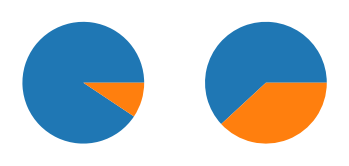

In [132]:
fig, ax = plt.subplots(1, 2)
ax[0].pie(provider.PotentialFraud.value_counts())
ax[1].pie(merge_df_transform.PotentialFraud.value_counts())


In [133]:
merge_df_transform.NoOfMonths_PartACov

0         12
1         12
2         12
3         12
4         12
          ..
558206    12
558207    12
558208    12
558209    12
558210    12
Name: NoOfMonths_PartACov, Length: 558211, dtype: int64

In [134]:
provider_aggregate = pd.DataFrame()
provider_aggregate['ChronicCond_Alzheimer'] = merge_provider_df.groupby('provider')

KeyError: 'provider'

In [155]:
yz_columns = ['Provider','PotentialFraud','ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'HospitalizedDays', 'Deceased', ]
merged_split_yz = merge_df_transform.loc[:, yz_columns]
merged_split_yz

,Provider,PotentialFraud,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,HospitalizedDays,Deceased
0,PRV55912,1,1,2,1,2,2,1,1,1,2,1,1,7.0,0
1,PRV55907,0,1,2,1,2,2,1,1,1,2,1,1,3.0,0
2,PRV56046,0,1,2,1,2,2,1,1,1,2,1,1,4.0,0
3,PRV52405,0,2,1,1,2,2,1,1,2,2,1,1,9.0,0
4,PRV56614,0,2,1,1,2,1,1,2,1,2,2,2,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV53699,0,1,1,2,2,2,1,1,2,2,1,2,0.0,0
558207,PRV53702,0,1,1,2,2,2,1,1,2,2,1,2,0.0,0
558208,PRV53676,0,1,1,2,2,2,1,1,2,2,1,2,0.0,0
558209,PRV53689,0,1,1,2,2,2,1,1,2,2,1,2,0.0,0


In [154]:
#1 means have chronic condition, 2 means does not have chronic condition
merged_split_yz.ChronicCond_Osteoporasis.value_counts()

2    380897
1    177314
Name: ChronicCond_Osteoporasis, dtype: int64

In [169]:
HospitalDays = merged_split_yz.groupby('Provider').agg(maxHospitalDays = ('HospitalizedDays', 'max'), 
                                                       medianHospitalDays = ('HospitalizedDays', 'median'),
                                                       aveHospitalDays = ('HospitalizedDays', 'mean'))
HospitalDays

,maxHospitalDays,medianHospitalDays,aveHospitalDays
Provider,,,
PRV51001,15.0,0.0,1.200000
PRV51003,28.0,0.0,2.893939
PRV51004,0.0,0.0,0.000000
PRV51005,0.0,0.0,0.000000
PRV51007,8.0,0.0,0.263889
...,...,...,...
PRV57759,0.0,0.0,0.000000
PRV57760,0.0,0.0,0.000000
PRV57761,0.0,0.0,0.000000


In [168]:
HospitalDays.medianHospitalDays.value_counts()

0.0     4796
4.0      128
5.0      100
3.0       76
6.0       61
2.0       41
4.5       31
7.0       25
3.5       23
5.5       21
1.0       17
8.0       16
6.5       10
9.0        9
2.5        9
1.5        6
7.5        5
10.0       4
14.0       3
18.0       3
20.0       3
12.0       3
8.5        3
10.5       2
9.5        2
0.5        2
16.0       2
13.0       2
14.5       1
21.0       1
11.5       1
19.5       1
11.0       1
36.0       1
25.0       1
Name: medianHospitalDays, dtype: int64

In [170]:
HospitalDays.aveHospitalDays.value_counts()

0.000000    3318
6.000000      23
2.000000      22
1.000000      21
4.000000      20
            ... 
1.652174       1
0.346154       1
0.783784       1
2.197917       1
7.272727       1
Name: aveHospitalDays, Length: 1577, dtype: int64

In [173]:
df_chronicCount = merged_split_yz.query('ChronicCond_Alzheimer == 1').groupby('Provider').agg(count1 = ('ChronicCond_Alzheimer', 'count'))
df_chronicCount

,count1
Provider,
PRV51001,15
PRV51003,56
PRV51004,64
PRV51005,426
PRV51007,26
...,...
PRV57758,2
PRV57759,14
PRV57760,3


In [187]:
df_chronicCount1 = merged_split_yz.groupby('Provider').agg(alzhemierTotal = ('ChronicCond_Alzheimer', 'count'))
df_chronicCount1

,alzhemierTotal
Provider,
PRV51001,25
PRV51003,132
PRV51004,149
PRV51005,1165
PRV51007,72
...,...
PRV57759,28
PRV57760,22
PRV57761,82


In [190]:
merged_split_yz.groupby('Provider').apply(lambda x: (x['ChronicCond_Alzheimer'] == 1).sum()/x['ChronicCond_Alzheimer'].count())


Provider
PRV51001    0.600000
PRV51003    0.424242
PRV51004    0.429530
PRV51005    0.365665
PRV51007    0.361111
              ...   
PRV57759    0.500000
PRV57760    0.136364
PRV57761    0.439024
PRV57762    0.000000
PRV57763    0.381356
Length: 5410, dtype: float64

In [191]:
provider_agg_df = pd.DataFrame()
provider_agg_df['Provider'] = provider.Provider

In [193]:
#Aggregate 
HospitalDays = merge_df_transform.groupby('Provider').agg(MaxHospitalDays = ('HospitalizedDays', 'max'), 
                                                       MedianHospitalDays = ('HospitalizedDays', 'median'),
                                                       MeanHospitalDays = ('HospitalizedDays', 'mean'))
provider_agg_df=provider_agg_df.merge(HospitalDays, on = 'Provider', how ='left')
provider_agg_df

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays
0,PRV51001,15.0,0.0,1.200000
1,PRV51003,28.0,0.0,2.893939
2,PRV51004,0.0,0.0,0.000000
3,PRV51005,0.0,0.0,0.000000
4,PRV51007,8.0,0.0,0.263889
...,...,...,...,...
5405,PRV57759,0.0,0.0,0.000000
5406,PRV57760,0.0,0.0,0.000000
5407,PRV57761,0.0,0.0,0.000000
5408,PRV57762,0.0,0.0,0.000000


In [197]:
chronic_lst = ['ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
for condition in chronic_lst:
    diesease = condition.split('_')[1]
    columnName = 'Chronic_' + diesease + '_Frac'
    provider_agg_df[columnName] = (merge_df_transform.groupby('Provider').apply(lambda x: (x[condition] == 1).sum()/x[condition].count())).values

In [199]:
provider_agg_df['Deceased_Frac'] = (merge_df_transform.groupby('Provider').apply(lambda x: (x['Deceased'] == 1).sum()/x['Deceased'].count())).values

In [200]:
provider_agg_df

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays,Chronic_Alzheimer_Frac,Chronic_Heartfailure_Frac,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
0,PRV51001,15.0,0.0,1.200000,0.600000,0.760000,0.680000,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.000000
1,PRV51003,28.0,0.0,2.893939,0.424242,0.606061,0.484848,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.007576
2,PRV51004,0.0,0.0,0.000000,0.429530,0.590604,0.335570,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.006711
3,PRV51005,0.0,0.0,0.000000,0.365665,0.583691,0.435193,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.003433
4,PRV51007,8.0,0.0,0.263889,0.361111,0.555556,0.305556,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.013889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.0,0.000000,0.500000,0.714286,0.535714,0.142857,0.392857,0.321429,0.714286,1.000000,0.464286,0.321429,0.142857,0.000000
5406,PRV57760,0.0,0.0,0.000000,0.136364,0.500000,0.090909,0.000000,0.090909,0.318182,0.818182,1.000000,0.500000,0.045455,0.000000,0.000000
5407,PRV57761,0.0,0.0,0.000000,0.439024,0.682927,0.487805,0.170732,0.365854,0.463415,0.670732,0.756098,0.390244,0.292683,0.121951,0.012195
5408,PRV57762,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [202]:
provider_agg_df['PotentialFraud'] = provider.PotentialFraud

In [203]:
provider_agg_df

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays,Chronic_Alzheimer_Frac,Chronic_Heartfailure_Frac,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac,PotentialFraud
0,PRV51001,15.0,0.0,1.200000,0.600000,0.760000,0.680000,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.000000,No
1,PRV51003,28.0,0.0,2.893939,0.424242,0.606061,0.484848,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.007576,Yes
2,PRV51004,0.0,0.0,0.000000,0.429530,0.590604,0.335570,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.006711,No
3,PRV51005,0.0,0.0,0.000000,0.365665,0.583691,0.435193,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.003433,Yes
4,PRV51007,8.0,0.0,0.263889,0.361111,0.555556,0.305556,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.013889,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.0,0.000000,0.500000,0.714286,0.535714,0.142857,0.392857,0.321429,0.714286,1.000000,0.464286,0.321429,0.142857,0.000000,No
5406,PRV57760,0.0,0.0,0.000000,0.136364,0.500000,0.090909,0.000000,0.090909,0.318182,0.818182,1.000000,0.500000,0.045455,0.000000,0.000000,No
5407,PRV57761,0.0,0.0,0.000000,0.439024,0.682927,0.487805,0.170732,0.365854,0.463415,0.670732,0.756098,0.390244,0.292683,0.121951,0.012195,No
5408,PRV57762,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,No


In [483]:
'''Export to csv'''

filepath = Path('../project2/provider_agg_yz.csv')
provider_agg_df.to_csv(filepath, index=False)

In [204]:
provider_agg_fraud = provider_agg_df[provider_agg_df['PotentialFraud'] == 'Yes']

In [205]:
provider_agg_fraud

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays,Chronic_Alzheimer_Frac,Chronic_Heartfailure_Frac,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac,PotentialFraud
1,PRV51003,28.0,0.0,2.893939,0.424242,0.606061,0.484848,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.007576,Yes
3,PRV51005,0.0,0.0,0.000000,0.365665,0.583691,0.435193,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.003433,Yes
13,PRV51021,18.0,0.0,0.649805,0.365759,0.564202,0.474708,0.233463,0.400778,0.451362,0.754864,0.762646,0.272374,0.330739,0.105058,0.003891,Yes
25,PRV51037,18.0,0.0,0.281938,0.429515,0.596916,0.398678,0.229075,0.341410,0.451542,0.685022,0.799559,0.370044,0.290749,0.063877,0.022026,Yes
37,PRV51052,15.0,0.0,0.434783,0.326087,0.630435,0.391304,0.130435,0.260870,0.413043,0.586957,0.695652,0.326087,0.282609,0.108696,0.000000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,PRV57642,24.0,0.0,0.768182,0.295455,0.531818,0.381818,0.159091,0.363636,0.500000,0.659091,0.645455,0.336364,0.200000,0.086364,0.018182,Yes
5324,PRV57667,22.0,9.0,12.000000,0.333333,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.333333,1.000000,0.000000,0.000000,Yes
5329,PRV57672,0.0,0.0,0.000000,0.364706,0.534118,0.423529,0.122353,0.268235,0.416471,0.663529,0.722353,0.284706,0.284706,0.094118,0.009412,Yes
5351,PRV57697,22.0,3.0,4.439394,0.469697,0.606061,0.469697,0.136364,0.303030,0.545455,0.757576,0.833333,0.318182,0.333333,0.121212,0.000000,Yes


In [206]:
provider_agg_non_fraud = provider_agg_df[provider_agg_df['PotentialFraud'] == 'No']

In [207]:
provider_agg_non_fraud

,Provider,MaxHospitalDays,MedianHospitalDays,MeanHospitalDays,Chronic_Alzheimer_Frac,Chronic_Heartfailure_Frac,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac,PotentialFraud
0,PRV51001,15.0,0.0,1.200000,0.600000,0.760000,0.680000,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.000000,No
2,PRV51004,0.0,0.0,0.000000,0.429530,0.590604,0.335570,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.006711,No
4,PRV51007,8.0,0.0,0.263889,0.361111,0.555556,0.305556,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.013889,No
5,PRV51008,6.0,0.0,0.232558,0.395349,0.581395,0.325581,0.209302,0.209302,0.279070,0.697674,0.767442,0.255814,0.139535,0.046512,0.000000,No
6,PRV51011,6.0,0.0,0.103448,0.431034,0.637931,0.431034,0.068966,0.362069,0.534483,0.706897,0.758621,0.344828,0.275862,0.034483,0.017241,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0.0,0.0,0.000000,0.500000,0.714286,0.535714,0.142857,0.392857,0.321429,0.714286,1.000000,0.464286,0.321429,0.142857,0.000000,No
5406,PRV57760,0.0,0.0,0.000000,0.136364,0.500000,0.090909,0.000000,0.090909,0.318182,0.818182,1.000000,0.500000,0.045455,0.000000,0.000000,No
5407,PRV57761,0.0,0.0,0.000000,0.439024,0.682927,0.487805,0.170732,0.365854,0.463415,0.670732,0.756098,0.390244,0.292683,0.121951,0.012195,No
5408,PRV57762,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,No


In [210]:
provider_agg_fraud.MaxHospitalDays.mean()

24.620553359683793

In [211]:
provider_agg_non_fraud.MaxHospitalDays.mean()

4.813417618270799

In [212]:
provider_agg_fraud.MeanHospitalDays.mean()

2.3324044276015856

In [213]:
provider_agg_non_fraud.MeanHospitalDays.mean()

0.8453904410987998

<AxesSubplot:ylabel='Frequency'>

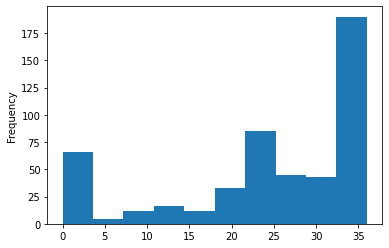

In [216]:
provider_agg_fraud.MaxHospitalDays.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

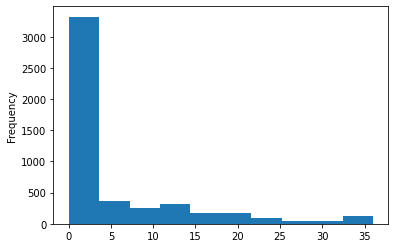

In [217]:
provider_agg_non_fraud.MaxHospitalDays.plot(kind='hist')

In [218]:
HospitalDays_In = merge_df_transform[merge_df_transform['In_Out'] == 1].groupby('Provider').agg(maxHospitalDays = ('HospitalizedDays', 'max'), 
                                                       medianHospitalDays = ('HospitalizedDays', 'median'),
                                                       aveHospitalDays = ('HospitalizedDays', 'mean'))
HospitalDays_In

,maxHospitalDays,medianHospitalDays,aveHospitalDays
Provider,,,
PRV51001,15.0,5.0,6.000000
PRV51003,28.0,5.0,6.161290
PRV51007,8.0,6.0,6.333333
PRV51008,6.0,5.0,5.000000
PRV51011,6.0,6.0,6.000000
...,...,...,...
PRV57719,36.0,10.5,14.750000
PRV57728,5.0,5.0,5.000000
PRV57729,16.0,6.0,6.545455


In [219]:
HospitalDays_In = HospitalDays_In.merge(provider, on = 'Provider', how ='left' )
HospitalDays_In

,Provider,maxHospitalDays,medianHospitalDays,aveHospitalDays,PotentialFraud
0,PRV51001,15.0,5.0,6.000000,No
1,PRV51003,28.0,5.0,6.161290,Yes
2,PRV51007,8.0,6.0,6.333333,No
3,PRV51008,6.0,5.0,5.000000,No
4,PRV51011,6.0,6.0,6.000000,No
...,...,...,...,...,...
2087,PRV57719,36.0,10.5,14.750000,No
2088,PRV57728,5.0,5.0,5.000000,No
2089,PRV57729,16.0,6.0,6.545455,No
2090,PRV57732,18.0,4.0,6.272727,No


In [484]:
'''Export to csv'''

filepath = Path('../project2/hospitalDays_agg.csv')
HospitalDays_In.to_csv(filepath, index=False)

In [221]:
HospitalDays_In_Fraud = HospitalDays_In[HospitalDays_In['PotentialFraud'] == 'Yes']
HospitalDays_In_Fraud

,Provider,maxHospitalDays,medianHospitalDays,aveHospitalDays,PotentialFraud
1,PRV51003,28.0,5.0,6.161290,Yes
5,PRV51021,18.0,5.0,5.758621,Yes
12,PRV51037,18.0,4.0,5.565217,Yes
17,PRV51052,15.0,10.0,10.000000,Yes
22,PRV51059,36.0,6.0,7.880000,Yes
...,...,...,...,...,...
2065,PRV57631,33.0,5.0,6.388889,Yes
2074,PRV57642,24.0,4.0,7.347826,Yes
2077,PRV57667,22.0,9.0,12.000000,Yes
2078,PRV57697,22.0,4.0,6.104167,Yes


In [222]:
HospitalDays_In_Non_Fraud = HospitalDays_In[HospitalDays_In['PotentialFraud'] == 'No']
HospitalDays_In_Non_Fraud

,Provider,maxHospitalDays,medianHospitalDays,aveHospitalDays,PotentialFraud
0,PRV51001,15.0,5.0,6.000000,No
2,PRV51007,8.0,6.0,6.333333,No
3,PRV51008,6.0,5.0,5.000000,No
4,PRV51011,6.0,6.0,6.000000,No
6,PRV51023,11.0,4.0,4.555556,No
...,...,...,...,...,...
2087,PRV57719,36.0,10.5,14.750000,No
2088,PRV57728,5.0,5.0,5.000000,No
2089,PRV57729,16.0,6.0,6.545455,No
2090,PRV57732,18.0,4.0,6.272727,No


<AxesSubplot:ylabel='Frequency'>

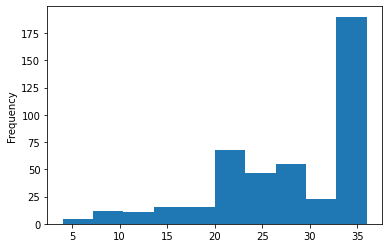

In [224]:
HospitalDays_In_Fraud.maxHospitalDays.plot(kind='hist')

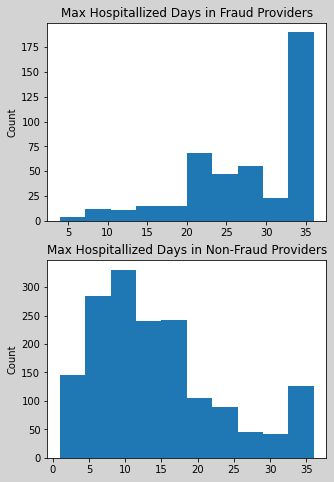

In [235]:
fig, ax = plt.subplots(2, 1, figsize = (5, 8))
fig.set_facecolor('lightgrey')

ax[0].hist(HospitalDays_In_Fraud.maxHospitalDays)
ax[0].set_title('Max Hospitallized Days in Fraud Providers')
ax[0].set_ylabel('Count')

ax[1].hist(HospitalDays_In_Non_Fraud.maxHospitalDays)
ax[1].set_title('Max Hospitallized Days in Non-Fraud Providers')
ax[1].set_ylabel('Count')
plt.show()

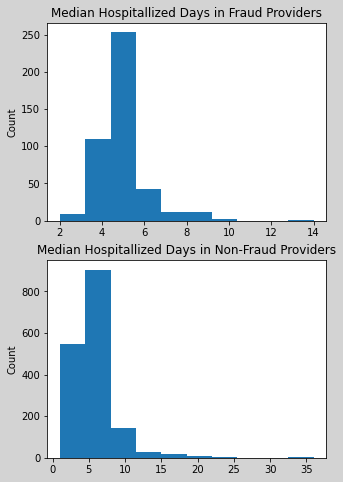

In [239]:
fig, ax = plt.subplots(2, 1, figsize = (5, 8))
fig.set_facecolor('lightgrey')

ax[0].hist(HospitalDays_In_Fraud.medianHospitalDays)
ax[0].set_title('Median Hospitallized Days in Fraud Providers')
ax[0].set_ylabel('Count')

ax[1].hist(HospitalDays_In_Non_Fraud.medianHospitalDays)
ax[1].set_title('Median Hospitallized Days in Non-Fraud Providers')
ax[1].set_ylabel('Count')
plt.show()

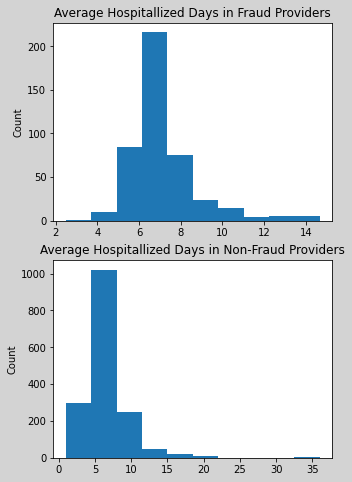

In [238]:
fig, ax = plt.subplots(2, 1, figsize = (5, 8))
fig.set_facecolor('lightgrey')

ax[0].hist(HospitalDays_In_Fraud.aveHospitalDays)
ax[0].set_title('Average Hospitallized Days in Fraud Providers')
ax[0].set_ylabel('Count')

ax[1].hist(HospitalDays_In_Non_Fraud.aveHospitalDays)
ax[1].set_title('Average Hospitallized Days in Non-Fraud Providers')
ax[1].set_ylabel('Count')
plt.show()

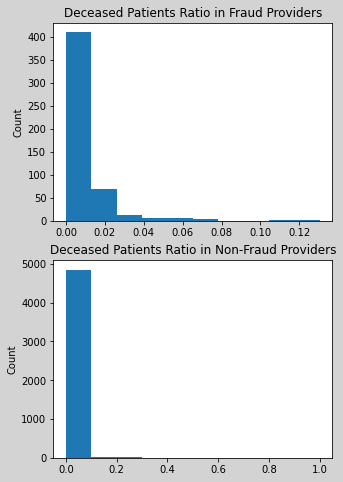

In [240]:
fig, ax = plt.subplots(2, 1, figsize = (5, 8))
fig.set_facecolor('lightgrey')

ax[0].hist(provider_agg_fraud.Deceased_Frac)
ax[0].set_title('Deceased Patients Ratio in Fraud Providers')
ax[0].set_ylabel('Count')

ax[1].hist(provider_agg_non_fraud.Deceased_Frac)
ax[1].set_title('Deceased Patients Ratio in Non-Fraud Providers')
ax[1].set_ylabel('Count')
plt.show()

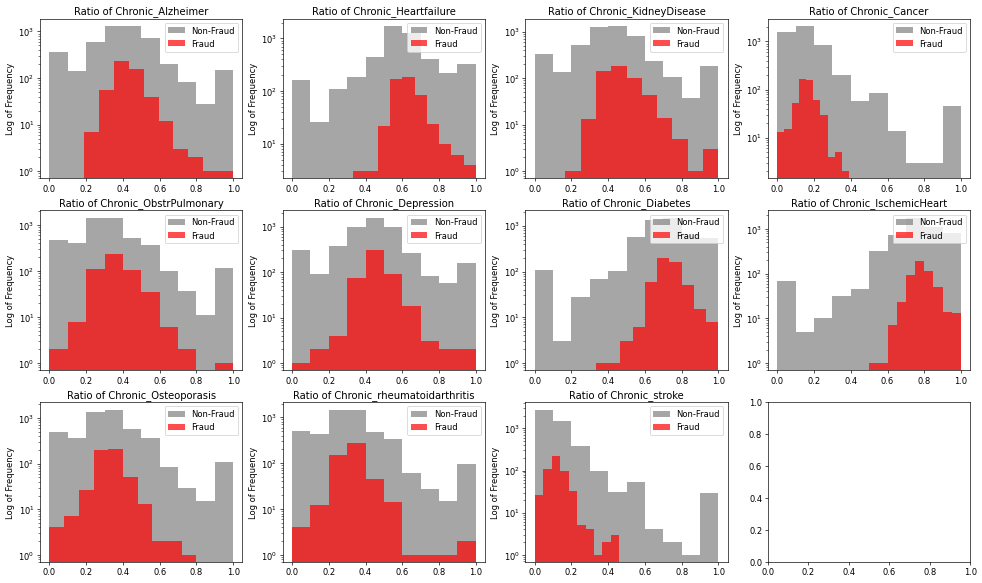

In [264]:
column_list = ['Chronic_Alzheimer_Frac', 'Chronic_Heartfailure_Frac',
       'Chronic_KidneyDisease_Frac', 'Chronic_Cancer_Frac',
       'Chronic_ObstrPulmonary_Frac', 'Chronic_Depression_Frac',
       'Chronic_Diabetes_Frac', 'Chronic_IschemicHeart_Frac',
       'Chronic_Osteoporasis_Frac', 'Chronic_rheumatoidarthritis_Frac',
       'Chronic_stroke_Frac']

#fig = plt.figure(figsize=(16,12),dpi=60)


nrow, ncol = 3, 4
fig, ax = plt.subplots(nrow, ncol, figsize = (20, 12), dpi =60)
for i in range(nrow):
    for j in range(ncol):
        index = i * ncol + j
        if index <= len(column_list) - 1:
            column_name = column_list[index]
            ax[i,j].hist(provider_agg_non_fraud[column_name], alpha=0.7, color='grey', label='Non-Fraud')
            ax[i,j].hist(provider_agg_fraud[column_name], alpha=0.7, color='red', label='Fraud')
            ax[i,j].set_title('Ratio of ' + column_name[: -5]  )
            ax[i,j].set_ylabel('Log of Frequency')
            ax[i,j].set_yscale('log')
            ax[i,j].legend(loc="upper right")
        else:
            column_name = ''
plt.show()


# for i in range(0,len(column_list)):
# # for i in range(len(provider_ys_df[num_col_list].columns)):
#     plt.subplot(4,3)
#     plt.hist(provider_agg_df.loc[provider_agg_df['PotentialFraud']=='No'].iloc[:,i:i+1].dropna().values,
#              alpha=0.7,color='gray',label='Normal')
#     plt.hist(provider_agg_df.loc[provider_agg_df['PotentialFraud']=='Yes'].iloc[:,i:i+1].dropna().values,
#              alpha=0.7,color='red',label='Fraud')
#     plt.title(column_list[i])
#     plt.yscale('log')
#     plt.legend(loc="upper right")
# plt.tight_layout()
# plt.show()

In [241]:
provider_agg_df.columns

Index(['Provider', 'MaxHospitalDays', 'MedianHospitalDays', 'MeanHospitalDays',
       'Chronic_Alzheimer_Frac', 'Chronic_Heartfailure_Frac',
       'Chronic_KidneyDisease_Frac', 'Chronic_Cancer_Frac',
       'Chronic_ObstrPulmonary_Frac', 'Chronic_Depression_Frac',
       'Chronic_Diabetes_Frac', 'Chronic_IschemicHeart_Frac',
       'Chronic_Osteoporasis_Frac', 'Chronic_rheumatoidarthritis_Frac',
       'Chronic_stroke_Frac', 'Deceased_Frac', 'PotentialFraud'],
      dtype='object')

In [274]:
provider_X_train = pd.read_csv('../project2/X_train_aggregated.csv')
provider_X_train.drop(columns=['Provider'], inplace=True)
provider_X_train

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
0,2.452381,200.0,12.000000,12.000000,3279.214286,43330,1377270,902.166667,9180,378910,...,0.480952,0.085714,0.242857,0.426190,0.719048,0.773810,0.357143,0.316667,0.040476,0.016667
1,3.750000,70.0,11.625000,12.000000,2082.500000,6110,66640,537.500000,1530,17200,...,0.375000,0.187500,0.281250,0.343750,0.593750,0.781250,0.218750,0.625000,0.062500,0.000000
2,1.785714,50.0,12.000000,12.000000,1757.500000,9840,49210,500.357143,3110,14010,...,0.178571,0.107143,0.285714,0.535714,0.714286,0.785714,0.392857,0.321429,0.071429,0.000000
3,4.473684,70.0,12.000000,12.000000,1498.157895,7400,56930,465.789474,1550,17700,...,0.342105,0.105263,0.236842,0.394737,0.500000,0.631579,0.342105,0.263158,0.078947,0.052632
4,4.059406,100.0,11.915842,11.881188,2032.673267,24260,410600,599.900990,6300,121180,...,0.430693,0.158416,0.356436,0.485149,0.643564,0.722772,0.321782,0.232673,0.084158,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4323,12.500000,100.0,12.000000,12.000000,1482.500000,3100,11860,806.250000,1850,6450,...,0.250000,0.125000,0.250000,0.500000,0.750000,0.875000,0.250000,0.375000,0.125000,0.000000
4324,2.923077,100.0,12.000000,12.000000,1804.461538,9920,117290,436.461538,1940,28370,...,0.415385,0.184615,0.230769,0.384615,0.738462,0.846154,0.153846,0.261538,0.061538,0.000000
4325,0.000000,0.0,12.000000,12.000000,2605.000000,4610,5210,500.000000,720,1000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.000000
4326,1.770833,100.0,11.875000,11.965278,2982.951389,22730,859090,681.250000,5010,196200,...,0.305556,0.166667,0.322917,0.583333,0.781250,0.697917,0.402778,0.343750,0.111111,0.003472


In [273]:
provider_X_test = pd.read_csv('../project2/X_test_aggregated.csv')
provider_X_test.drop(columns=['Provider'], inplace=True)
provider_X_test

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
0,1068.000000,1068.0,11.793103,12.000000,2823.275862,15970,163750,608.448276,5020,35290,...,0.568966,0.155172,0.482759,0.500000,0.879310,0.913793,0.258621,0.465517,0.172414,0.017241
1,1.509434,100.0,12.000000,12.000000,2088.301887,21660,332040,647.735849,6480,102990,...,0.377358,0.194969,0.421384,0.459119,0.723270,0.754717,0.314465,0.238994,0.113208,0.006289
2,271.000000,1068.0,11.400000,12.000000,1823.000000,5170,36460,325.000000,1000,6500,...,0.700000,0.200000,0.250000,0.450000,0.750000,0.900000,0.200000,0.600000,0.200000,0.000000
3,2.352941,40.0,12.000000,12.000000,1745.882353,6870,29680,312.941176,1240,5320,...,0.352941,0.176471,0.529412,0.235294,0.647059,0.647059,0.235294,0.470588,0.000000,0.058824
4,718.085714,1068.0,11.830986,11.915493,1553.239437,31760,110280,420.281690,6840,29840,...,0.549296,0.112676,0.436620,0.338028,0.732394,0.830986,0.338028,0.394366,0.112676,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,13.616162,1068.0,12.000000,12.000000,2019.292929,7700,199910,530.202020,2060,52490,...,0.383838,0.121212,0.212121,0.383838,0.585859,0.747475,0.353535,0.292929,0.070707,0.010101
1078,4.880383,200.0,12.000000,11.918660,2361.770335,22990,493610,558.564593,4560,116740,...,0.320574,0.157895,0.301435,0.444976,0.665072,0.794258,0.229665,0.253589,0.033493,0.004785
1079,3.174603,100.0,12.000000,12.000000,3163.492063,10120,199300,510.000000,1730,32130,...,0.666667,0.349206,0.380952,0.571429,0.746032,0.730159,0.349206,0.412698,0.333333,0.000000
1080,79.142857,1068.0,12.000000,12.000000,1528.571429,6220,21400,346.428571,1340,4850,...,0.357143,0.142857,0.357143,0.357143,0.642857,0.785714,0.142857,0.428571,0.142857,0.000000


In [269]:
provider_y_train = pd.read_csv('../project2/y_train_agg.csv')
provider_y_train.value_counts()

PotentialFraud
0                 3925
1                  403
dtype: int64

In [270]:
provider_y_test = pd.read_csv('../project2/y_test_agg.csv')
provider_y_test.value_counts()

PotentialFraud
0                 979
1                 103
dtype: int64

In [282]:
provider_X_test = provider_X_test.fillna(-1)

In [283]:
provider_X_test[provider_X_test.isnull().any(axis=1)]

,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,OPAnnualDeductibleAmt_sum,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac


In [292]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
steps_logistic_base = [('rescale', MinMaxScaler()),
         ('logistic', LogisticRegression())]
model_logistic_base = Pipeline(steps_logistic_base)
model_logistic_base.fit(provider_X_train, provider_y_train)


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('rescale', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [293]:
y_train_logis_base_pred = model_logistic_base.predict(provider_X_train)
y_test_logis_base_pred = model_logistic_base.predict(provider_X_test)

In [290]:
def calScores(y_train, y_train_pred, y_test, y_test_pred):
    scores = pd.DataFrame(index = ['precision', 'recall', 'F1_score'], columns= ['train', 'test'])
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    scores.iloc[0,0] = train_precision
    scores.iloc[1,0] = train_recall
    scores.iloc[2,0] = train_f1

    scores.iloc[0,1] = test_precision
    scores.iloc[1,1] = test_recall
    scores.iloc[2,1] = test_f1
    return scores

In [294]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
scores = calScores(provider_y_train, y_train_logis_base_pred, provider_y_test, y_test_logis_base_pred)
scores

,train,test
precision,0.742049,0.75
recall,0.521092,0.524272
F1_score,0.612245,0.617143


In [305]:
print(classification_report(provider_y_test, y_test_logis_base_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       979
           1       0.75      0.52      0.62       103

    accuracy                           0.94      1082
   macro avg       0.85      0.75      0.79      1082
weighted avg       0.93      0.94      0.93      1082



In [306]:
from sklearn.metrics import roc_auc_score
train_roc_auc = roc_auc_score(provider_y_train, model_logistic_base.decision_function(provider_X_train))
train_roc_auc

0.9482935310015648

In [303]:
test_roc_auc = roc_auc_score(provider_y_test, model_logistic_base.predict_proba(provider_X_test)[:, 1])
test_roc_auc

0.9462796394180708

In [298]:
model_logistic_base[1].coef_


array([[ 0.52382603, -0.25808494,  0.26084573, -0.18057497, -0.0834685 ,
         0.17180881,  2.03215918, -0.34600453,  0.64060804,  2.00670887,
         1.93679096, -0.03868412, -0.54575838,  0.766748  , -0.23093448,
         0.61989345, -0.13896807,  1.76225654,  3.86846529,  2.29988809,
        -0.02366913,  2.2845786 , -0.60125034,  1.09281672,  0.01330551,
         1.35609011, -0.35942421,  1.15920986,  0.45296035, -0.24351151,
         0.64173202,  1.17001209,  0.07373479,  2.10361738, -0.40365985,
         0.79169257,  1.93161589, -0.25843842, -0.09208045,  3.4346665 ,
        -1.37596554, -0.67557165, -0.38198535,  0.72497729,  0.57532234,
        -0.3282174 ,  0.28218471,  0.36159386, -0.18529843,  0.10619475,
         0.11539197,  0.10184608, -0.13096539,  0.26647021]])

In [313]:
provider_X_train.columns

Index(['DeductibleAmtPaid_mean', 'DeductibleAmtPaid_max',
       'NoOfMonths_PartACov_mean', 'NoOfMonths_PartBCov_mean',
       'OPAnnualReimbursementAmt_mean', 'OPAnnualReimbursementAmt_max',
       'OPAnnualReimbursementAmt_sum', 'OPAnnualDeductibleAmt_mean',
       'OPAnnualDeductibleAmt_max', 'OPAnnualDeductibleAmt_sum', 'ClaimCounts',
       'Gender', 'ClaimPeriod', 'RaceOneFrac', 'MajorRace',
       'RenalDiseaseIndicator', 'Age', 'uniqBeneCount', 'ClmsperBene',
       'TotalInscClaimAmtReimbursed', 'MeanInscClaimAmtReimbursed',
       'MaxInscClaimAmtReimbursed', 'uniqATPhysnCount', 'ClmsperATPhysn',
       'uniqOPPhysnCount', 'ClmsperOPPhysn', 'uniqOTPhysnCount',
       'ClmsperOTPhysn', 'InClmsPct', 'StateCount_Uniq', 'MajorState',
       'CountyCount_Uniq', 'MajorCounty', 'TotalIPAnnualReimbursementAmt',
       'MeanIPAnnualReimbursementAmt', 'MaxIPAnnualReimbursementAmt',
       'TotalIPAnnualDeductibleAmtdf', 'MeanIPAnnualDeductibleAmt',
       'MaxIPAnnualDeductibleAmt', '

In [317]:
logistic_base_feature_importance = pd.DataFrame()
logistic_base_feature_importance['Feature'] = provider_X_train.columns
logistic_base_feature_importance['Coef'] = model_logistic_base[1].coef_[0]

In [318]:
logistic_base_feature_importance

,Feature,Coef
0,DeductibleAmtPaid_mean,0.523826
1,DeductibleAmtPaid_max,-0.258085
2,NoOfMonths_PartACov_mean,0.260846
3,NoOfMonths_PartBCov_mean,-0.180575
4,OPAnnualReimbursementAmt_mean,-0.083469
5,OPAnnualReimbursementAmt_max,0.171809
6,OPAnnualReimbursementAmt_sum,2.032159
7,OPAnnualDeductibleAmt_mean,-0.346005
8,OPAnnualDeductibleAmt_max,0.640608
9,OPAnnualDeductibleAmt_sum,2.006709


In [320]:
logistic_base_feature_importance[abs(logistic_base_feature_importance['Coef'])>= 0.5]

,Feature,Coef
0,DeductibleAmtPaid_mean,0.523826
6,OPAnnualReimbursementAmt_sum,2.032159
8,OPAnnualDeductibleAmt_max,0.640608
9,OPAnnualDeductibleAmt_sum,2.006709
10,ClaimCounts,1.936791
12,ClaimPeriod,-0.545758
13,RaceOneFrac,0.766748
15,RenalDiseaseIndicator,0.619893
17,uniqBeneCount,1.762257
18,ClmsperBene,3.868465


In [322]:
feature_list_0_5 = logistic_base_feature_importance[abs(logistic_base_feature_importance['Coef'])>= 0.5].Feature

In [325]:
feature_list_0_5.tolist()

['DeductibleAmtPaid_mean',
 'OPAnnualReimbursementAmt_sum',
 'OPAnnualDeductibleAmt_max',
 'OPAnnualDeductibleAmt_sum',
 'ClaimCounts',
 'ClaimPeriod',
 'RaceOneFrac',
 'RenalDiseaseIndicator',
 'uniqBeneCount',
 'ClmsperBene',
 'TotalInscClaimAmtReimbursed',
 'MaxInscClaimAmtReimbursed',
 'uniqATPhysnCount',
 'ClmsperATPhysn',
 'ClmsperOPPhysn',
 'ClmsperOTPhysn',
 'MajorState',
 'CountyCount_Uniq',
 'TotalIPAnnualReimbursementAmt',
 'MaxIPAnnualReimbursementAmt',
 'TotalIPAnnualDeductibleAmtdf',
 'MaxHospitalDays',
 'MedianHospitalDays',
 'MeanHospitalDays',
 'Chronic_Heartfailure_Frac',
 'Chronic_KidneyDisease_Frac']

In [326]:
feature_list_1 = logistic_base_feature_importance[abs(logistic_base_feature_importance['Coef'])>= 1].Feature

In [327]:
provider_X_train_1 = provider_X_train[feature_list_1]

In [328]:
provider_X_train_1

,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_sum,ClaimCounts,uniqBeneCount,ClmsperBene,TotalInscClaimAmtReimbursed,MaxInscClaimAmtReimbursed,ClmsperATPhysn,ClmsperOPPhysn,ClmsperOTPhysn,CountyCount_Uniq,TotalIPAnnualReimbursementAmt,TotalIPAnnualDeductibleAmtdf,MaxHospitalDays,MedianHospitalDays
0,1377270,378910,420,115,3.652174,127360,3300,20.000000,24.705882,26.250000,9,1962920,171948,0.0,0.0
1,66640,17200,32,26,1.230769,10910,3000,2.285714,16.000000,4.571429,10,138000,35476,0.0,0.0
2,49210,14010,28,27,1.037037,6140,3200,4.666667,9.333333,5.600000,12,125080,11748,0.0,0.0
3,56930,17700,38,38,1.000000,5360,1600,1.310345,9.500000,2.375000,14,121320,14952,0.0,0.0
4,410600,121180,202,182,1.109890,60120,3300,28.857143,33.666667,33.666667,10,1340890,111460,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4323,11860,6450,8,8,1.000000,1640,700,1.333333,4.000000,2.000000,5,8000,2136,0.0,0.0
4324,117290,28370,65,45,1.444444,15490,3300,21.666667,32.500000,32.500000,3,166950,25632,0.0,0.0
4325,5210,1000,2,2,1.000000,240,200,1.000000,-99.000000,2.000000,1,3000,1068,0.0,0.0
4326,859090,196200,288,109,2.642202,90010,9030,16.000000,24.000000,19.200000,14,1424480,170444,0.0,0.0


In [329]:
provider_X_test_1 = provider_X_test[feature_list_1]

In [330]:
provider_X_test_1

,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_sum,ClaimCounts,uniqBeneCount,ClmsperBene,TotalInscClaimAmtReimbursed,MaxInscClaimAmtReimbursed,ClmsperATPhysn,ClmsperOPPhysn,ClmsperOTPhysn,CountyCount_Uniq,TotalIPAnnualReimbursementAmt,TotalIPAnnualDeductibleAmtdf,MaxHospitalDays,MedianHospitalDays
0,163750,35290,58,57,1.017544,739000,57000,58.000000,58.00,58.000000,11,1077590,98916,28.0,5.0
1,332040,102990,159,115,1.382609,39370,3200,12.230769,15.90,14.454545,10,923130,88376,0.0,0.0
2,36460,6500,20,14,1.428571,35420,10000,3.333333,10.00,6.666667,4,66100,20680,11.0,0.0
3,29680,5320,17,17,1.000000,2450,1700,3.400000,17.00,5.666667,5,10000,1068,0.0,0.0
4,110280,29840,71,67,1.059701,495650,57000,5.071429,17.75,8.875000,11,817330,95712,30.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,199910,52490,99,55,1.800000,29730,10000,5.823529,11.00,9.000000,8,267160,41652,8.0,0.0
1078,493610,116740,209,131,1.595420,53760,3300,209.000000,209.00,-99.000000,1,986360,76896,0.0,0.0
1079,199300,32130,63,27,2.333333,12890,1100,63.000000,63.00,-99.000000,6,231040,40584,0.0,0.0
1080,21400,4850,14,14,1.000000,6300,4000,2.000000,7.00,4.666667,6,40240,6408,6.0,0.0


In [507]:
steps_logistic_feature_1 = [('rescale', MinMaxScaler()),
         ('logistic', LogisticRegression(random_state=42, class_weight='balanced'))]
model_logistic_feature_1 = Pipeline(steps_logistic_feature_1)
model_logistic_feature_1.fit(provider_X_train_1, provider_y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('rescale', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [508]:
y_train_logis_features_1_pred = model_logistic_feature_1.predict(provider_X_train_1)
y_test_logis_features_1_pred = model_logistic_feature_1.predict(provider_X_test_1)
scores = calScores(provider_y_train, y_train_logis_features_1_pred, provider_y_test, y_test_logis_features_1_pred)
scores

,train,test
precision,0.456163,0.423581
recall,0.890819,0.941748
F1_score,0.603361,0.584337


In [509]:
print(classification_report(provider_y_train, y_train_logis_features_1_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3925
           1       0.46      0.89      0.60       403

    accuracy                           0.89      4328
   macro avg       0.72      0.89      0.77      4328
weighted avg       0.94      0.89      0.91      4328



In [510]:
print(classification_report(provider_y_test, y_test_logis_features_1_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       979
           1       0.42      0.94      0.58       103

    accuracy                           0.87      1082
   macro avg       0.71      0.90      0.75      1082
weighted avg       0.94      0.87      0.89      1082



In [511]:
train_feature_1_roc_auc = roc_auc_score(provider_y_train, model_logistic_feature_1.decision_function(provider_X_train_1))
train_feature_1_roc_auc

0.9472175246163329

In [512]:
test_feature_1_roc_auc = roc_auc_score(provider_y_test, model_logistic_feature_1.decision_function(provider_X_test_1))
test_feature_1_roc_auc

0.9498398405347245

In [513]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, threshold = precision_recall_curve(provider_y_train, model_logistic_feature_1.decision_function(provider_X_train_1))
print(auc(recall, precision))

0.706316179130783


In [514]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, threshold = precision_recall_curve(provider_y_test, model_logistic_feature_1.decision_function(provider_X_test_1))
print(auc(recall, precision))

0.6988385929758919


In [515]:
print(precision)
print(recall)
print(threshold)

[0.09519409 0.09528215 0.09537037 ... 1.         1.         1.        ]
[1.         1.         1.         ... 0.01941748 0.00970874 0.        ]
[-3.38700255 -3.38668828 -3.38661665 ...  8.31135667  8.69094196
 12.65088627]


In [338]:
claim_X_train = pd.read_csv('../project2/X_train_claims.csv')

/var/folders/4r/5r7tbtx178l60wyz85w2n3l4l0q0z9/T/ipykernel_944/3382109174.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  claim_X_train = pd.read_csv('../project2/X_train_claims.csv')


In [339]:
claim_X_train

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimPeriod,HospitalizedDays,Deceased,Age,DiagnosisCodeCount,ProcedureCodeCount
0,BENE11001,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,1970,...,36000,3204,60,70,7,7.0,0,66,9,0
1,BENE11001,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,...,36000,3204,60,70,3,3.0,0,66,3,1
2,BENE11001,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,...,36000,3204,60,70,4,4.0,0,66,6,0
3,BENE11011,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,...,5000,1068,250,320,9,9.0,0,95,9,1
4,BENE11014,PRV56614,10000,PHY379376,PHY398258,NaN,78321,1068.0,975,042,...,21260,2136,120,100,18,18.0,0,71,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443019,BENE159196,PRV51851,60,PHY344222,PHY344222,PHY370416,-999,0.0,-999,1749,...,2000,1068,3240,1390,1,0.0,0,93,7,0
443020,BENE159196,PRV51836,800,PHY376936,NaN,PHY313818,-999,0.0,-999,5160,...,2000,1068,3240,1390,1,0.0,0,93,5,0
443021,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,-999,0.0,-999,07041,...,0,0,5470,1870,1,0.0,0,57,3,0
443022,BENE159198,PRV53689,70,PHY403198,NaN,PHY419379,-999,0.0,-999,NaN,...,0,0,5470,1870,1,0.0,0,57,0,0


<AxesSubplot:ylabel='Frequency'>

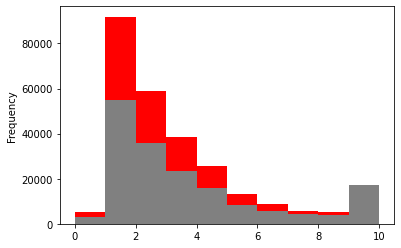

In [349]:
claim_X_train[claim_y_train['PotentialFraud'] == 0].DiagnosisCodeCount.plot(kind = 'hist', color = 'r')
claim_X_train[claim_y_train['PotentialFraud'] == 1].DiagnosisCodeCount.plot(kind = 'hist', color = 'grey')



In [344]:
claim_y_train = pd.read_csv('../project2/y_train_claims.csv')
claim_y_train

,PotentialFraud
0,1
1,0
2,0
3,0
4,0
...,...
443019,1
443020,1
443021,0
443022,0


<AxesSubplot:ylabel='Frequency'>

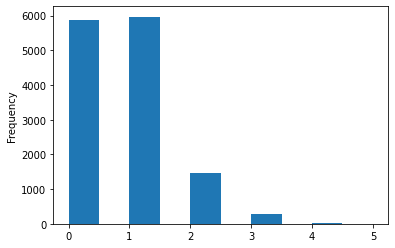

In [355]:
claim_X_train[(claim_X_train['In_Out'] == 1) & (claim_y_train['PotentialFraud'] == 0)].ProcedureCodeCount.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

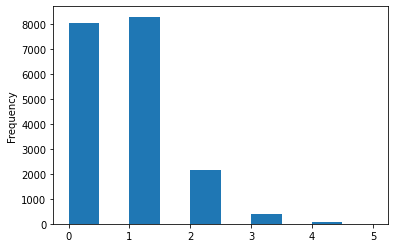

In [356]:
claim_X_train[(claim_X_train['In_Out'] == 1) & (claim_y_train['PotentialFraud'] == 1)].ProcedureCodeCount.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

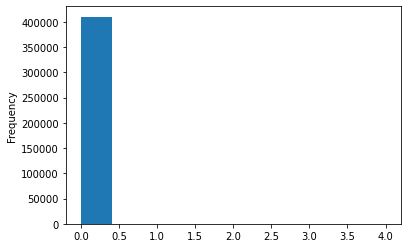

In [343]:
claim_X_train[claim_X_train['In_Out'] == 0].ProcedureCodeCount.plot(kind = 'hist')

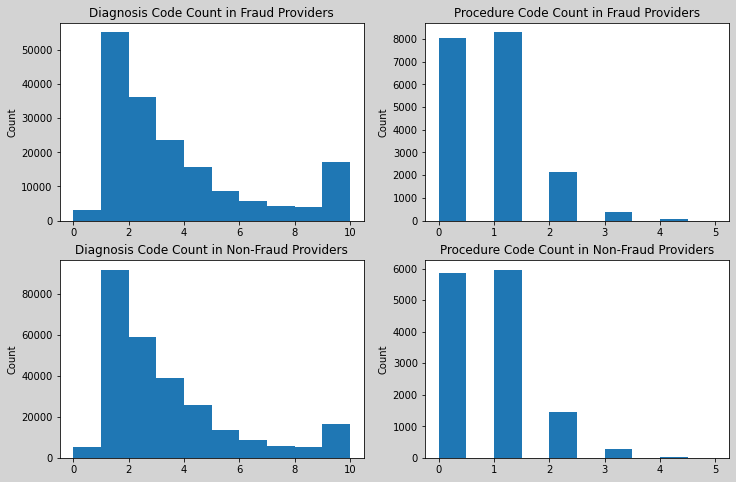

In [360]:
fig, ax = plt.subplots(2, 2, figsize = (12, 8))
fig.set_facecolor('lightgrey')

ax[0, 0].hist(claim_X_train[claim_y_train['PotentialFraud'] == 1].DiagnosisCodeCount)
ax[0, 0].set_title('Diagnosis Code Count in Fraud Providers')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(claim_X_train[(claim_X_train['In_Out'] == 1) & (claim_y_train['PotentialFraud'] == 1)].ProcedureCodeCount)
ax[0, 1].set_title('Procedure Code Count in Fraud Providers')
ax[0, 1].set_ylabel('Count')

ax[1, 0].hist(claim_X_train[claim_y_train['PotentialFraud'] == 0].DiagnosisCodeCount)
ax[1, 0].set_title('Diagnosis Code Count in Non-Fraud Providers')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(claim_X_train[(claim_X_train['In_Out'] == 1) & (claim_y_train['PotentialFraud'] == 0)].ProcedureCodeCount)
ax[1, 1].set_title('Procedure Code Count in Non-Fraud Providers')
ax[1, 1].set_ylabel('Count')
plt.show()

In [361]:
claim_X_train.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'In_Out', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'Chro

In [362]:
claim_X_train[claim_y_train['PotentialFraud'] == 1].ClmDiagnosisCode_1.value_counts().nlargest(15)

4019     4108
4011     3708
2724     1078
42731     943
2722      915
2720      903
2723      888
2721      885
78659     871
78650     754
7802      750
V5789     713
486       707
41401     697
78651     657
Name: ClmDiagnosisCode_1, dtype: int64

In [363]:
claim_X_train[claim_y_train['PotentialFraud'] == 0].ClmDiagnosisCode_1.value_counts().nlargest(15)

4019     6978
4011     6273
2724     1776
2720     1607
2721     1505
2723     1494
2722     1473
78659    1258
78651    1158
42731    1152
78650    1135
7802     1075
25000    1030
42789     810
78079     798
Name: ClmDiagnosisCode_1, dtype: int64

In [364]:
claim_X_train[claim_y_train['PotentialFraud'] == 1].ClmDiagnosisCode_2.value_counts().nlargest(15)

4019     7025
25000    3646
2724     3585
V5861    2934
V5869    2844
42731    1898
2449     1754
2720     1551
4280     1394
53081    1374
4011     1366
2859     1349
28521    1279
496      1209
41401    1138
Name: ClmDiagnosisCode_2, dtype: int64

In [ ]:
'''columns: list of columns ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2']'''
def countCodeNumbers(df, columns):
    df_codes = merge_df_transform.loc[:, columns]
    codecount = df_codes.notnull().sum(axis=1)
    return codecount

diagnosis_code_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
           'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10' ]
procedure_code_columns = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

merge_df_transform['DiagnosisCodeCount'] = countCodeNumbers(merge_df_transform, diagnosis_code_columns)
merge_df_transform['ProcedureCodeCount'] = countCodeNumbers(merge_df_transform, procedure_code_columns)

In [386]:
vc2 = claim_X_train.ClmDiagnosisCode_2.value_counts()
count2 = vc2.to_dict()
count2

{'4019': 17775,
 '25000': 9341,
 '2724': 8922,
 'V5861': 7689,
 'V5869': 7661,
 '42731': 4627,
 '2449': 4542,
 '2720': 4059,
 '4011': 3677,
 '53081': 3321,
 '2859': 3250,
 '28521': 3245,
 '4280': 3213,
 '496': 3007,
 '78079': 2782,
 '41400': 2741,
 '41401': 2590,
 '58881': 2188,
 '3051': 2138,
 '2809': 2097,
 '5990': 1929,
 '311': 1859,
 '73300': 1804,
 'V5883': 1667,
 '71590': 1636,
 '7242': 1488,
 '7295': 1415,
 '5859': 1304,
 '7812': 1301,
 '72887': 1298,
 '7823': 1205,
 'V4581': 1205,
 '30000': 1177,
 '49390': 1115,
 'V7644': 1050,
 '78605': 1047,
 'V5866': 1045,
 '60000': 1031,
 '2948': 1006,
 '73390': 1006,
 '56210': 993,
 '412': 978,
 'V1254': 971,
 '4439': 970,
 '7245': 950,
 'V103': 939,
 '7197': 928,
 '40390': 918,
 '2722': 917,
 '27800': 912,
 'V1582': 909,
 '71946': 891,
 '7862': 872,
 '71941': 852,
 '5939': 847,
 '5856': 830,
 'V4582': 815,
 '71690': 807,
 '5853': 795,
 'V4501': 757,
 '78650': 756,
 '2768': 752,
 'V4589': 749,
 'V0481': 724,
 '7840': 718,
 '7804': 718,
 'V

In [392]:
claim_X_train[claim_X_train['ClmDiagnosisCode_2'] == 'V4571']

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimPeriod,HospitalizedDays,Deceased,Age,DiagnosisCodeCount,ProcedureCodeCount
5,BENE11017,PRV54986,8000,PHY402711,PHY402711,PHY402711,1749,1068.0,597,1745,...,22000,2136,1400,840,7,7.0,0,69,9,1
5696,BENE36862,PRV56556,13000,PHY349321,PHY349321,NaN,71536,1068.0,487,71536,...,13100,1068,0,0,6,6.0,0,47,9,1
6038,BENE38389,PRV52120,3000,PHY324753,PHY324753,NaN,7242,1068.0,474,7213,...,3000,1068,0,0,4,4.0,0,72,9,1
6055,BENE38483,PRV52281,2000,PHY406880,NaN,NaN,45342,1068.0,261,45340,...,2000,1068,0,0,4,4.0,0,64,9,0
12376,BENE67802,PRV52918,700,PHY317626,PHY419660,NaN,V5811,1068.0,826,V5812,...,4700,2136,6020,1530,7,7.0,0,62,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431547,BENE154925,PRV53229,70,PHY322200,NaN,NaN,V7611,0.0,-999,V775,...,0,0,70,20,1,0.0,0,87,3,0
432720,BENE155364,PRV55058,40,PHY401053,NaN,NaN,-999,0.0,-999,78650,...,0,0,370,540,2,0.0,0,77,8,0
433380,BENE155611,PRV53100,70,PHY340758,NaN,NaN,-999,0.0,-999,1740,...,0,0,470,10,1,0.0,0,76,2,0
437438,BENE157095,PRV51578,30,PHY425943,PHY326754,PHY387152,-999,0.0,-999,1623,...,0,0,1050,440,3,0.0,0,69,3,0


In [445]:
def mergeDictionaryWithUpdate(dict_1, dict_2):
    for key in dict_2:
        value = dict_2[key]
       # print(key, value)
        if key not in dict_1:
            dict_1[key] = value
        else:
            old_value = int(dict_1[key])
            dict_1[key] = old_value + value
    return dict_1        

a = {'4019': 11086, '4011': 9981}
b = {'4019': 1086, '4012': 9981}
a = mergeDictionaryWithUpdate(a, b)
a

{'4019': 12172, '4011': 9981, '4012': 9981}

In [398]:
vc2 = claim_X_train.ClmDiagnosisCode_2.value_counts()
vc2

4019     17775
25000     9341
2724      8922
V5861     7689
V5869     7661
         ...  
36313        1
20420        1
99669        1
1599         1
28851        1
Name: ClmDiagnosisCode_2, Length: 5002, dtype: int64

In [447]:
def getTotalCodeCounts(df, columns):
    code_counts = {}
    for column in columns:
    
        value_counts = df[column].value_counts().to_dict()
        code_counts = mergeDictionaryWithUpdate(code_counts, value_counts)
    sorted_counts = dict(sorted(code_counts.items(), key=lambda item: item[1], reverse=True))
    top50 = pd.DataFrame(sorted_counts.items(), columns= ['Code', 'Count'])[0:50]
    return top50    
    

In [ ]:
diagnosis_code_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
           'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']

In [448]:
fraud_diagcode_count = getTotalCodeCounts(claim_train_fraud, diagnosis_code_columns)
fraud_diagcode_count

,Code,Count
0,4019,25181
1,25000,12278
2,2724,11870
3,V5869,7360
4,42731,7106
5,4011,7051
6,V5861,6220
7,2449,5850
8,4280,5747
9,2720,5715


In [449]:
non_fraud_diagcode_count = getTotalCodeCounts(claim_train_non_fraud, diagnosis_code_columns)
non_fraud_diagcode_count

,Code,Count
0,4019,36146
1,25000,17331
2,2724,16546
3,V5869,12343
4,4011,11855
5,V5861,9687
6,42731,8972
7,2720,8716
8,2449,8098
9,53081,6650


In [414]:
claim_train_fraud = claim_X_train[claim_y_train['PotentialFraud'] == 1]

In [450]:
fraud_prod_code_count = getTotalCodeCounts(claim_train_fraud, procedure_code_columns)
fraud_prod_code_count

,Code,Count
0,0,154154
1,-999,154074
2,1,18923
3,4019.0,914
4,2724.0,517
5,9904.0,506
6,8154.0,496
7,66.0,420
8,3893.0,383
9,3995.0,382


In [451]:
non_fraud_prod_code_count = getTotalCodeCounts(claim_train_non_fraud, procedure_code_columns)
non_fraud_prod_code_count

,Code,Count
0,0,256342
1,-999,256182
2,1,13605
3,4019.0,658
4,9904.0,415
5,2724.0,329
6,8154.0,318
7,3893.0,305
8,66.0,278
9,3995.0,273


In [432]:
fraud_diagcode_count_top50 = pd.DataFrame(fraud_diagcode_count.items())[0:49]

In [433]:
fraud_diagcode_count_top50

,0,1
0,4019,25181
1,25000,12278
2,2724,11870
3,V5869,7360
4,42731,7106
5,4011,7051
6,V5861,6220
7,2449,5850
8,4280,5747
9,2720,5715


In [454]:
claim_X_train.ClmProcedureCode_2.head(50)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12    2724.0
13       NaN
14       NaN
15       NaN
16    5849.0
17       NaN
18       NaN
19    4019.0
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26    4019.0
27    2762.0
28    2762.0
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
42     311.0
43       NaN
44       NaN
45       NaN
46       NaN
47       NaN
48       NaN
49       NaN
Name: ClmProcedureCode_2, dtype: float64

In [455]:
merge_df_transform.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'In_Out', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'Chro

In [463]:
numeric_list = ['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'DeductibleAmtPaid','NoOfMonths_PartACov', 'NoOfMonths_PartBCov']

df_numeric = merge_df_transform[numeric_list]
df_numeric

,InscClaimAmtReimbursed,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,NoOfMonths_PartACov,NoOfMonths_PartBCov
0,26000,36000,3204,60,70,1068.0,12,12
1,5000,36000,3204,60,70,1068.0,12,12
2,5000,36000,3204,60,70,1068.0,12,12
3,5000,5000,1068,250,320,1068.0,12,12
4,10000,21260,2136,120,100,1068.0,12,12
...,...,...,...,...,...,...,...,...
558206,800,0,0,5470,1870,0.0,12,12
558207,400,0,0,5470,1870,0.0,12,12
558208,60,0,0,5470,1870,0.0,12,12
558209,70,0,0,5470,1870,0.0,12,12


<AxesSubplot:>

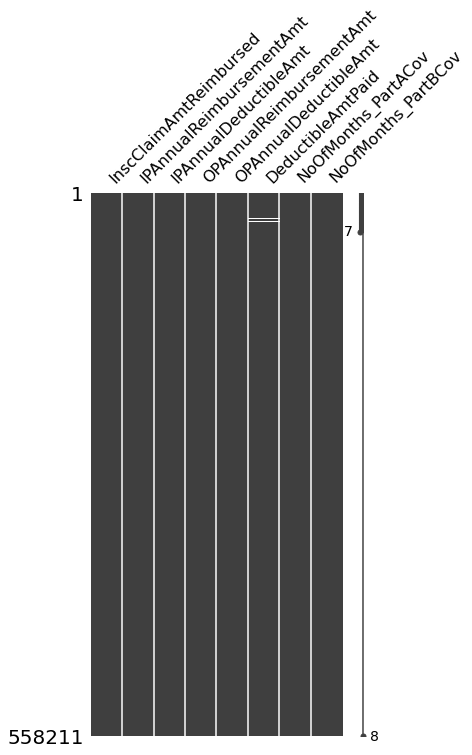

In [467]:
import missingno as msno
msno.matrix(df_numeric, figsize=(5,10))

In [473]:
treatment_list = ['AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'In_Out']
df_treatment = merge_df_transform[treatment_list]
df_treatment

,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In_Out
0,PHY390922,NaN,NaN,7866,1068.0,201,1970,4019,5853,7843,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,PHY318495,PHY318495,NaN,6186,1068.0,750,6186,2948,56400,NaN,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,PHY372395,NaN,PHY324689,29590,1068.0,883,29623,30390,71690,34590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,PHY379376,PHY398258,NaN,78321,1068.0,975,042,3051,34400,5856,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PHY364188,PHY364188,PHY385752,NaN,0.0,-999,2163,V4575,53190,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
558207,PHY423019,PHY332284,NaN,NaN,0.0,-999,07041,5781,25000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
558208,PHY361063,NaN,NaN,NaN,0.0,-999,V570,78079,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
558209,PHY403198,NaN,PHY419379,NaN,0.0,-999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


<AxesSubplot:>

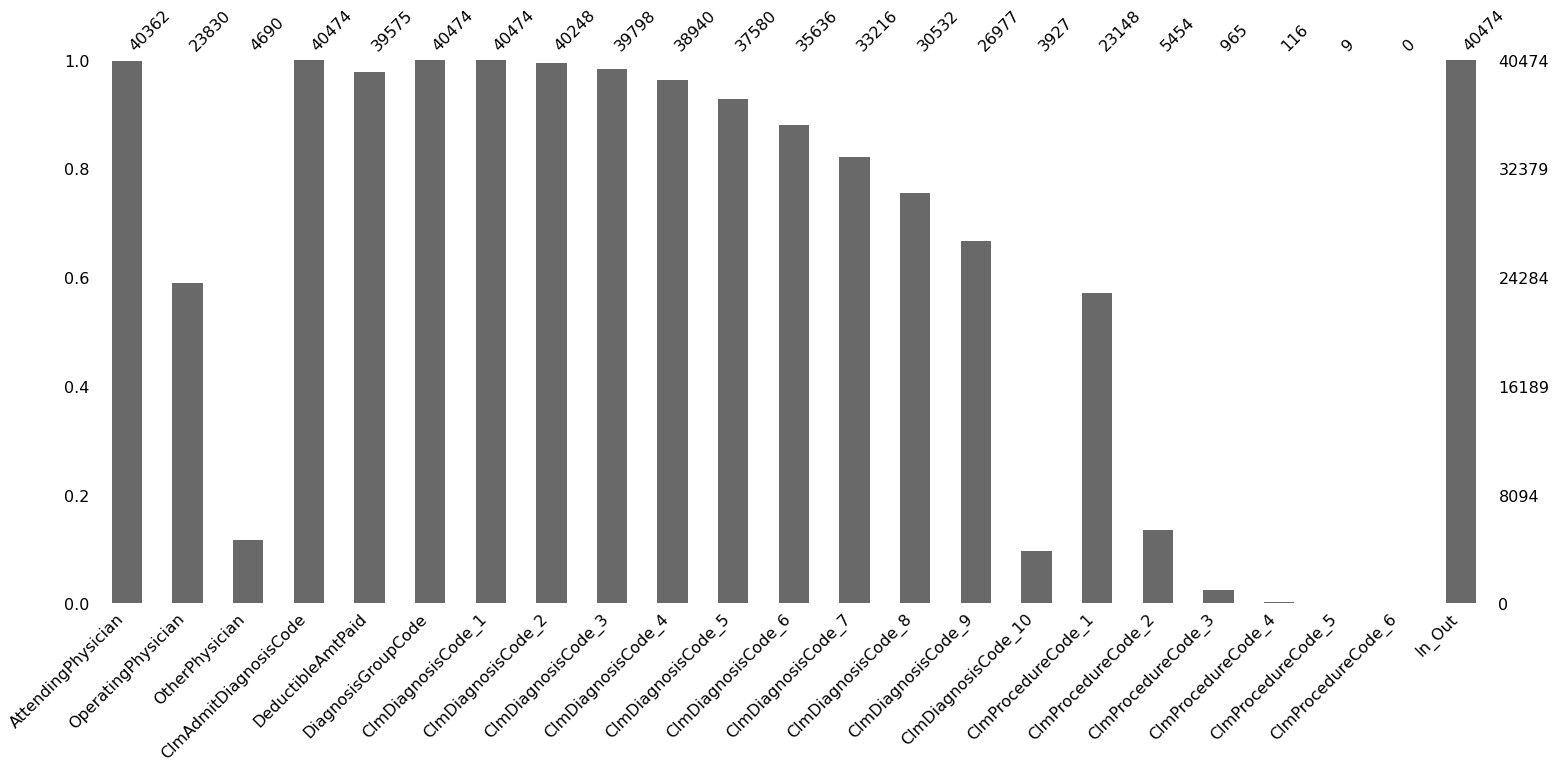

In [474]:
msno.bar(df_treatment[df_treatment['In_Out'] == 1])

In [470]:
bene_list = ['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
df_bene_basic = merge_df_transform[bene_list]
df_bene_basic

,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,1,1,0,39,230,1,2,1,2,2,1,1,1,2,1,1
1,1,1,0,39,230,1,2,1,2,2,1,1,1,2,1,1
2,1,1,0,39,230,1,2,1,2,2,1,1,1,2,1,1
3,2,2,0,1,360,2,1,1,2,2,1,1,2,2,1,1
4,2,1,Y,45,780,2,1,1,2,1,1,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2,1,0,21,20,1,1,2,2,2,1,1,2,2,1,2
558207,2,1,0,21,20,1,1,2,2,2,1,1,2,2,1,2
558208,2,1,0,21,20,1,1,2,2,2,1,1,2,2,1,2
558209,2,1,0,21,20,1,1,2,2,2,1,1,2,2,1,2


<AxesSubplot:>

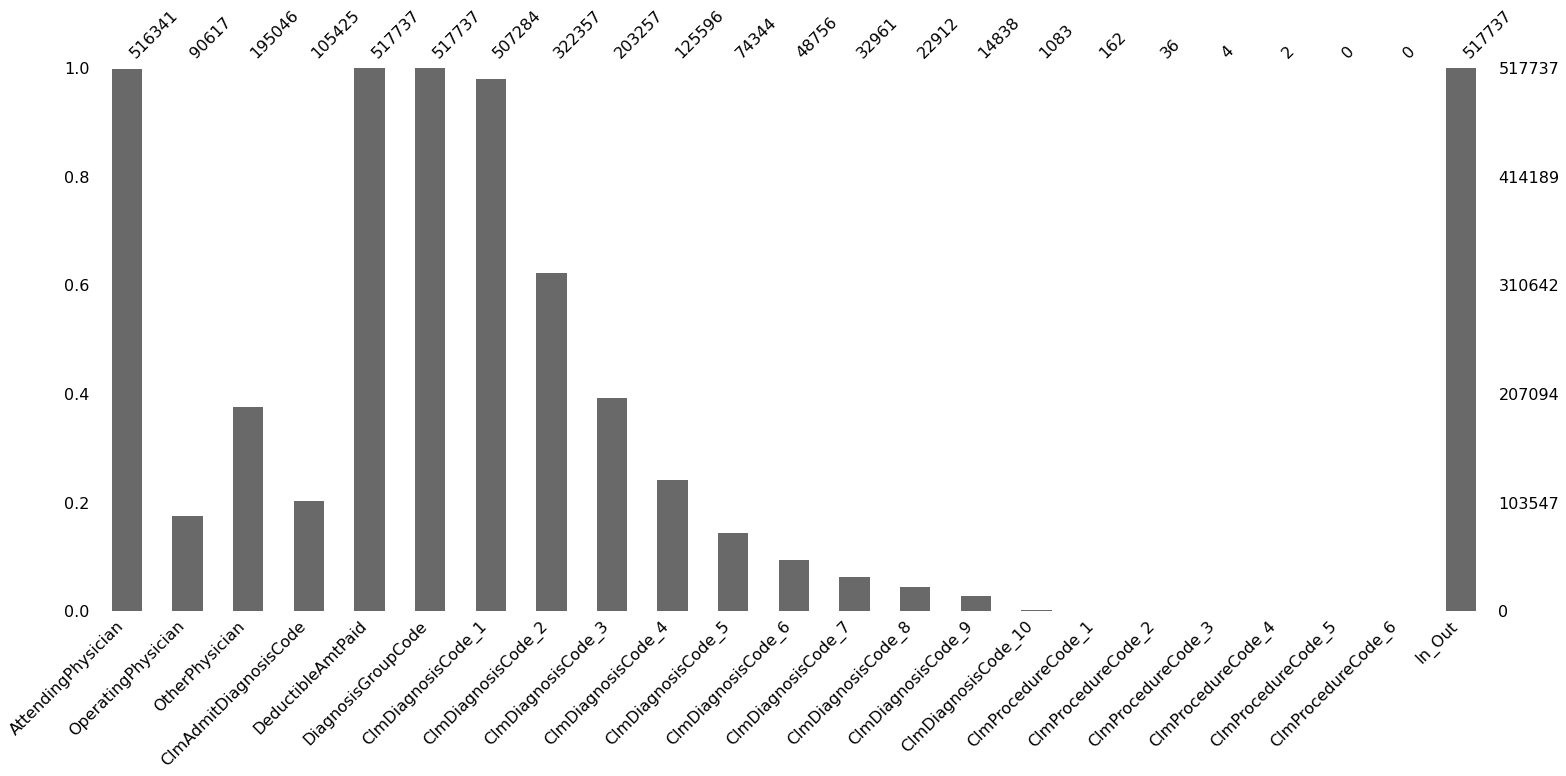

In [475]:
msno.bar(df_treatment[df_treatment['In_Out'] == 0])

<AxesSubplot:>

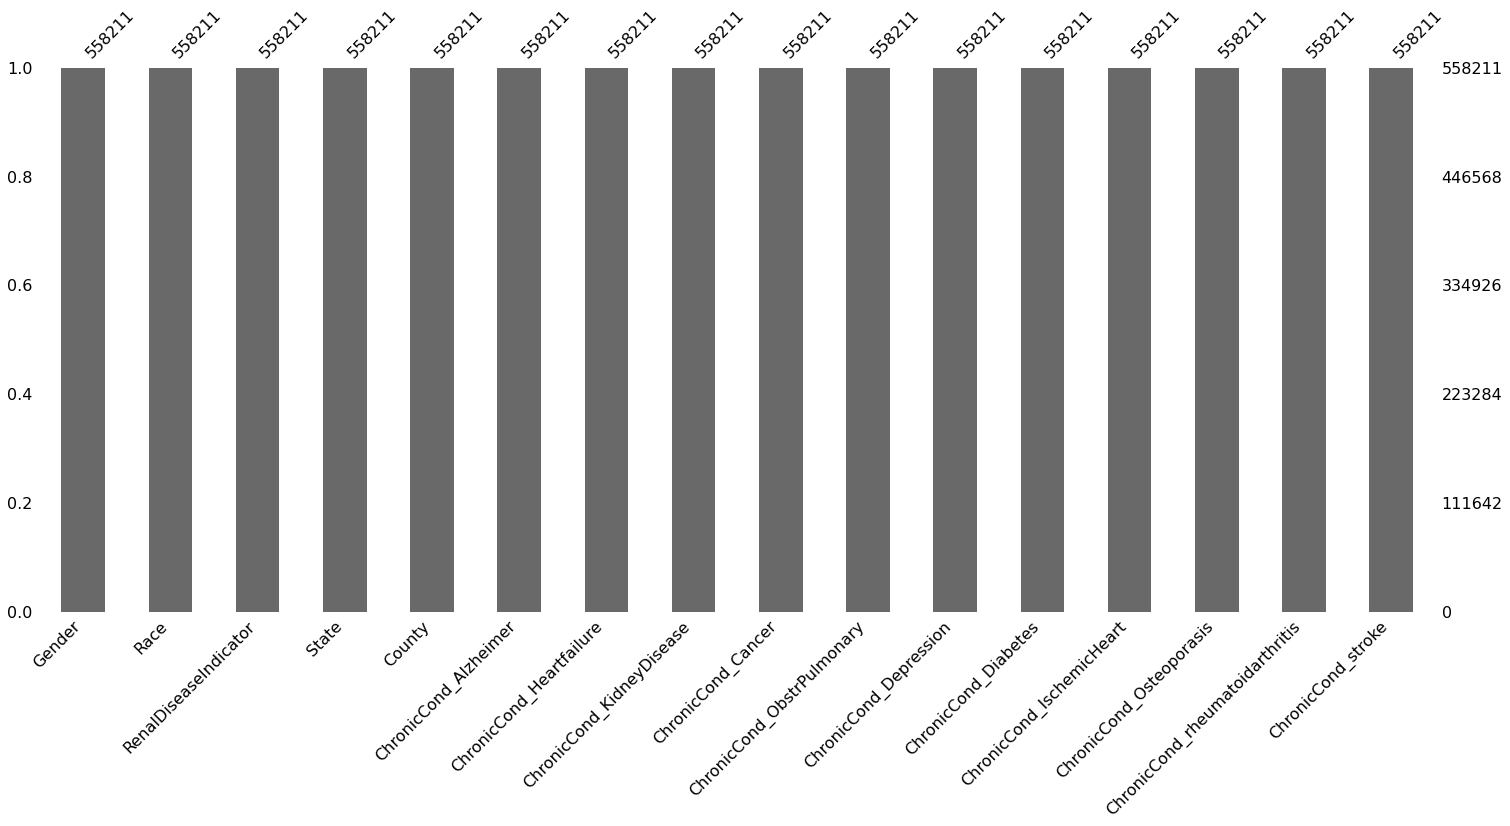

In [471]:
msno.bar(df_bene_basic)

In [476]:
pearsoncorr = df_numeric.corr(method='pearson')

<AxesSubplot:>

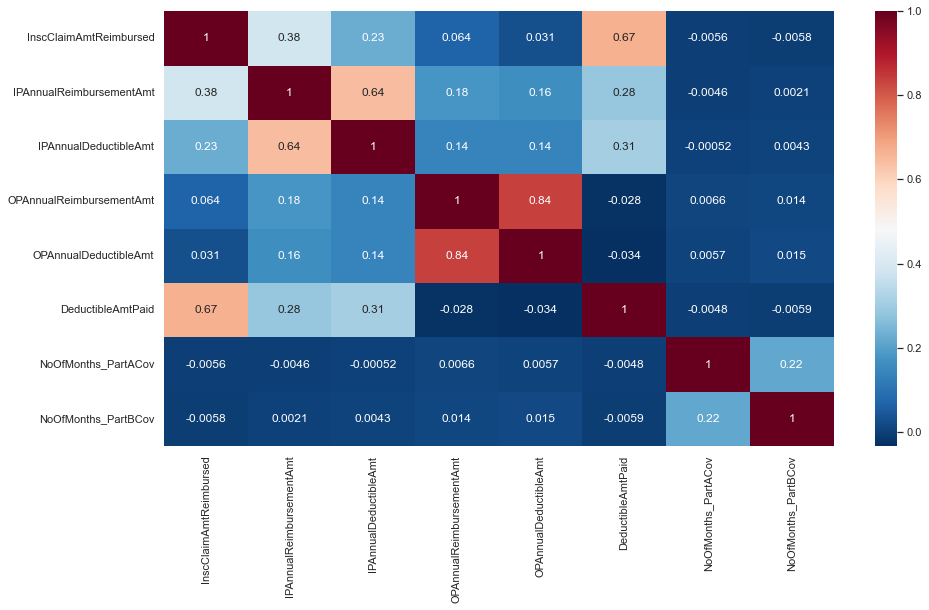

In [482]:
import seaborn as sb
sb.set(rc = {'figure.figsize':(15,8)})
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True)